## Домашняя работа # 1.

## Image processing with openCV.

В этой домашней работе мы попробуем применить классические методы обработки изображений.

* Deadline: **23.02.2023 23:59:00 NSK**

In [1]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np

##### Задача 1 (3 балла)
Переведите изображение **Печать.jpg** в цветовое пространство HSV, CIELab или YCbCr. Подберите пороги для нужных осей, чтобы получить изображение синей печати отдельно от чёрного текста. Переведите полученное изображение обратно в RGB и отобразите результат. 

In [2]:
default_img = cv2.imread("imgs/print.jpg")

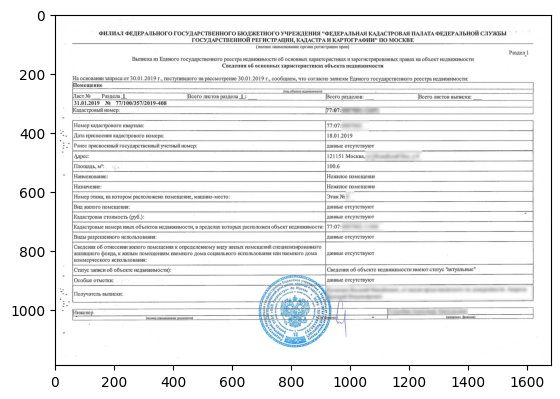

In [3]:
plt.imshow(cv2.cvtColor(default_img, cv2.COLOR_BGR2RGB))

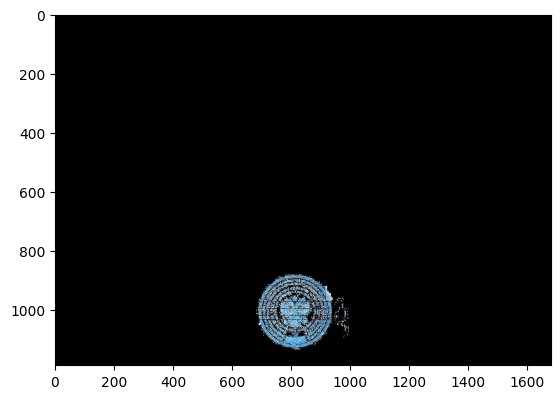

In [65]:
BLUE_HUE = 100
TRASHHOLD_BLUE = 20
hsv_stamp = np.copy(cv2.cvtColor(default_img, cv2.COLOR_BGR2HSV))

for row in hsv_stamp:
    for hsv in row:
        # print(hsv)
        # stamp_img_row.append(hsv)
        if abs(hsv[0] - BLUE_HUE) > TRASHHOLD_BLUE:
            hsv[2] = 0
            # print(stamp_img_row)
plt.imshow(cv2.cvtColor(hsv_stamp, cv2.COLOR_HSV2RGB))

Так как подпись тоже синяя от неё остались артефакты

##### Задача 2 (3 балла)
Переведите изображение **Книга.jpg** в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ( 𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒 ) и эквализации гистограммы ( 𝑒𝑞𝑢𝑎𝑙𝑖𝑧𝑒𝐻𝑖𝑠𝑡 ). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности

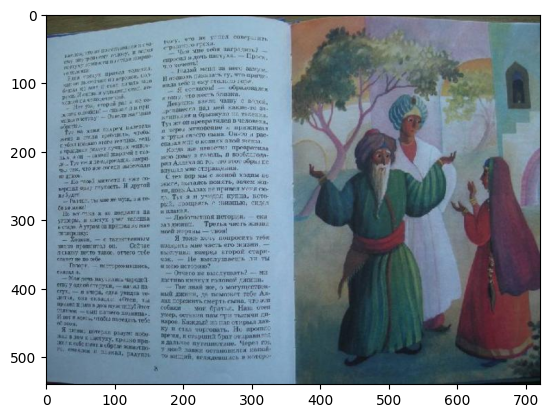

In [68]:
book_img = cv2.imread("imgs\\book.jpg")
plt.imshow(cv2.cvtColor(book_img, cv2.COLOR_BGR2RGB))

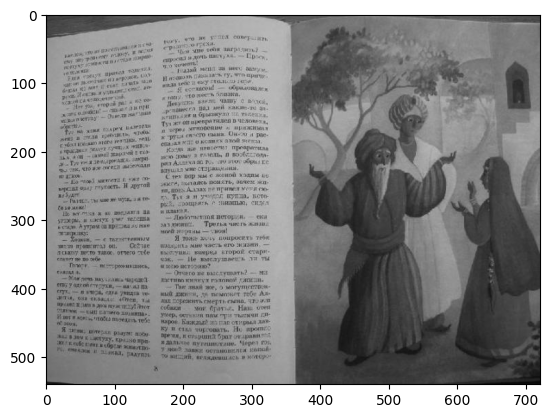

In [75]:
gray_book_img = cv2.cvtColor(book_img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_book_img, cv2.COLOR_GRAY2RGB))

(540, 721)


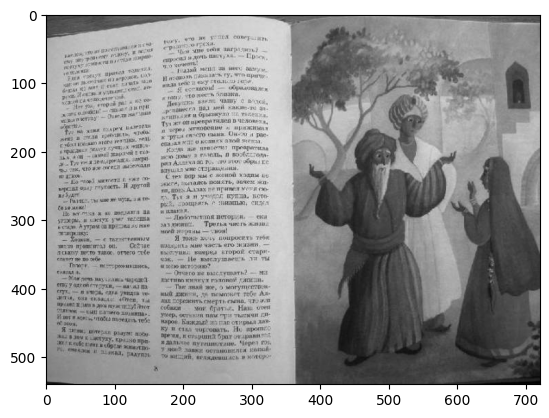

In [78]:
normalizedImg = cv2.normalize(gray_book_img,  None, 0, 255, cv2.NORM_MINMAX)
print(normalizedImg.shape)
plt.imshow(cv2.cvtColor(normalizedImg, cv2.COLOR_GRAY2RGB))

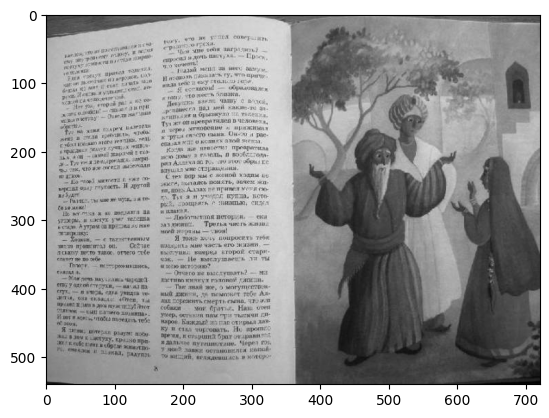

In [81]:
equalize_hist = cv2.equalizeHist(gray_book_img)
plt.imshow(cv2.cvtColor(normalizedImg, cv2.COLOR_GRAY2RGB))

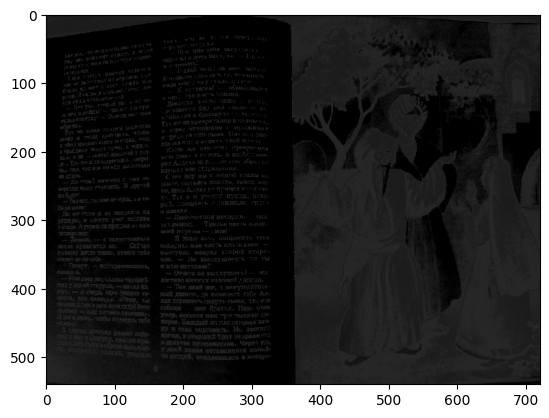

In [83]:
delta_imgs = cv2.subtract(normalizedImg, equalize_hist)
plt.imshow(cv2.cvtColor(delta_imgs, cv2.COLOR_GRAY2RGB))

In [84]:
res = np.hstack((gray_book_img, normalizedImg, equalize_hist, delta_imgs))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_GRAY2RGB))

##### Задача 3 (6 баллов) 
Выберите по два произвольных знаяения для каждого параметра гамма-коррекции ($\Gamma = ..$, $c = ..$). Получится 4 различных комбинации. Примените гамма-преобразование изображения **Книга.jpg** для каждой комбинации параметров. Отобразите исходное изображение **Книга.jpg** и его гамма-преобразования.

In [86]:
book_img_rgb = np.copy(book_img)

In [190]:
gamma_coefs = [1/1.2, 1/1.8]
c_coefs = [1.5, 3.5]

In [191]:
def gamma_correction(img, gamma, c):
    gamma_image = (img ** gamma) * c
    gamma_image = np.clip(gamma_image, 0, 255).astype(np.uint8, casting='unsafe')
    return gamma_image

In [192]:
res = book_img_rgb
for gamma in gamma_coefs:
    for c in c_coefs:
        gamm_image = gamma_correction(book_img_rgb, gamma, c)
        res = np.hstack((res, gamm_image))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
cv2.imwrite("gamma_correction.png", res)

True

: 

##### Задача 4 (10 баллов)

Загрузите изображение **Лена.jpg**. Переведите изображение в градации серого. Произведите фильтрацию данного изображения в частотной области идеальным фильтром низких частот (фильтр, обрезающий все высокочастотные составляющие Фурье-образа, находящиеся на большем расстоянии от начала координат, чем некоторое заданное расстояние $D$), идеальным фильтром высоких частот (фильтр, обрезающий все низкокочастотные составляющие Фурье-образа, находящиеся на меньшем расстоянии от начала координат, чем некоторое заданное расстояние $D$) со следующими значениями радиуса фильтров:
1. 5
2. 15
3. 30
4. 255

Для каждого фильтра постройте состыкованное изображение из следующих: исходное изображение в градациях серого, изображение Фурье-спектра (после логарифмической коррекции для лучшей визуализации), изображение Фурье-спектра после фильтрации, изображение в пространственной области после фильтрации. На выходе должно получиться 8 изображения (4 параметра фильтров х 2 типа фильтров). Функции, которые Вам потребуются: `dft`, `mulSpectrums`, `idft`.

##### Задача 5 (3 балла)
Выделите в изображении **table.jpg** границы таблицы с использованием морфологических операций. Результатом обработки должно быть изображение, в котором присутствует текст и удалены все стороны таблицы.